In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('TBS-ecotriplet\\2025_06_23.txt', delimiter='\t')

In [3]:
df

,date,time,Unnamed: 2,turb,Unnamed: 4,chl,Unnamed: 6,cDOM,Unnamed: 8,Unnamed: 9
0,06/16/25,16:16:02,700.0,4130.0,695.0,1004.0,460.0,4130.0,541.0,NaN
1,06/16/25,16:16:03,700.0,4130.0,695.0,1001.0,460.0,4130.0,541.0,NaN
2,06/16/25,16:16:04,700.0,4130.0,695.0,1002.0,460.0,4130.0,541.0,NaN
3,06/16/25,16:16:05,700.0,4130.0,695.0,1001.0,460.0,4130.0,541.0,NaN
4,06/16/25,16:16:06,700.0,4130.0,695.0,1000.0,460.0,4130.0,541.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6026,06/23/25,15:56:35,700.0,4130.0,695.0,1061.0,460.0,4130.0,547.0,NaN
6027,06/23/25,15:56:36,700.0,4130.0,695.0,1061.0,460.0,4130.0,547.0,NaN
6028,06/23/25,15:56:37,700.0,4130.0,695.0,1059.0,460.0,4130.0,547.0,NaN
6029,06/23/25,15:56:39,700.0,4130.0,695.0,1060.0,460.0,4130.0,547.0,NaN


In [4]:
print(df.dtypes)

date           object
time           object
Unnamed: 2    float64
turb          float64
Unnamed: 4    float64
chl           float64
Unnamed: 6    float64
cDOM          float64
Unnamed: 8    float64
Unnamed: 9    float64
dtype: object


In [5]:

#df['cDOM'] = pd.to_numeric(df['cDOM'], errors='coerce')


In [6]:
print(df.dtypes)

date           object
time           object
Unnamed: 2    float64
turb          float64
Unnamed: 4    float64
chl           float64
Unnamed: 6    float64
cDOM          float64
Unnamed: 8    float64
Unnamed: 9    float64
dtype: object


In [7]:
#calculate the parameters according to the manual
chl = 0.0122*(df['chl']-51)
turb = (2.966e-06)*(df['turb']-50)
cDOM = 0.0905*(df['cDOM'].astype(float)-47)
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

C:\Users\pauliins\AppData\Local\Temp\ipykernel_8004\1465471502.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])


In [8]:
datetime = df['datetime'] 

(0.0, 5.0)

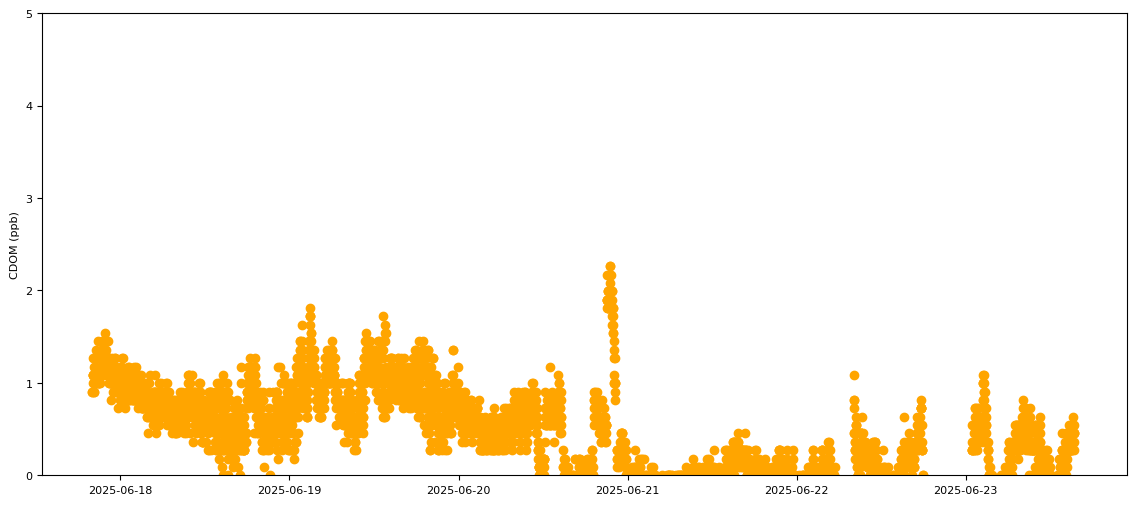

In [9]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=8)
plt.scatter(datetime[1000:], cDOM[1000:], color='orange')
plt.ylabel('CDOM (ppb)')
plt.ylim(0, 5)

(0.0, 0.009)

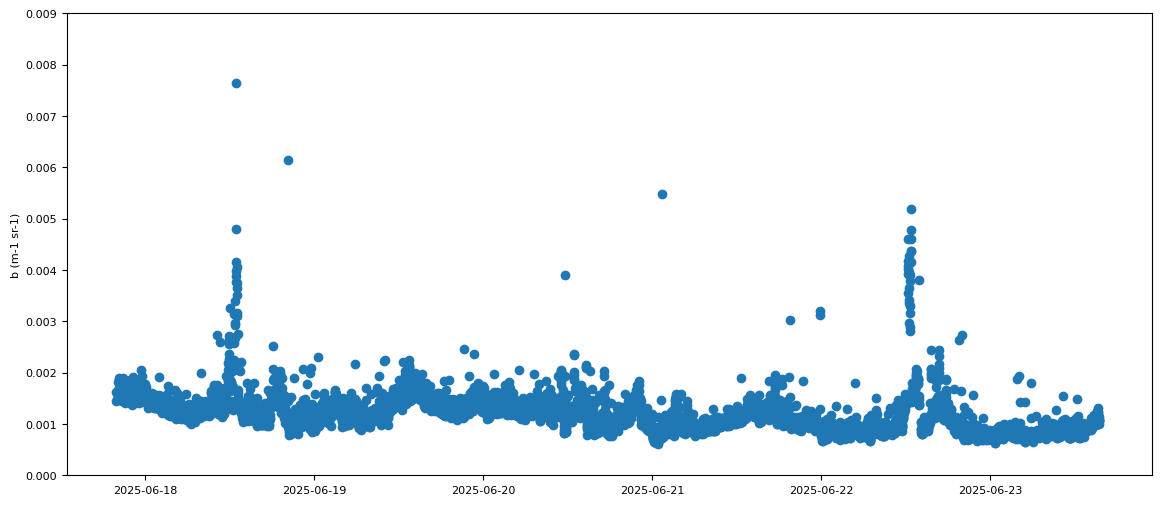

In [10]:
plt.figure(figsize=(14, 6))
plt.scatter(datetime[1000:], turb[1000:])
plt.ylabel('chl (µg/L) and water level obs (dm)')
plt.ylabel('b (m-1 sr-1)')
plt.ylim(0,0.009)

In [11]:
df_vannstansdata = pd.read_csv('TBS-ecotriplet\\vannstandsdata_Trondheim vannstandsmåler.txt', delimiter='\s+')
datetime_vann = pd.to_datetime(df_vannstansdata['datetime'])
level = df_vannstansdata['level']
df_vannstansdata

,datetime,level,tide
0,2025-05-28T01:00:00+02:00,326.3,304.0
1,2025-05-28T02:00:00+02:00,298.5,275.7
2,2025-05-28T03:00:00+02:00,234.0,214.0
3,2025-05-28T04:00:00+02:00,162.6,143.5
4,2025-05-28T05:00:00+02:00,104.6,84.1
...,...,...,...
306,2025-06-09T19:00:00+02:00,103.3,96.9
307,2025-06-09T20:00:00+02:00,138.5,131.5
308,2025-06-09T21:00:00+02:00,183.3,176.6
309,2025-06-09T22:00:00+02:00,229.5,221.5


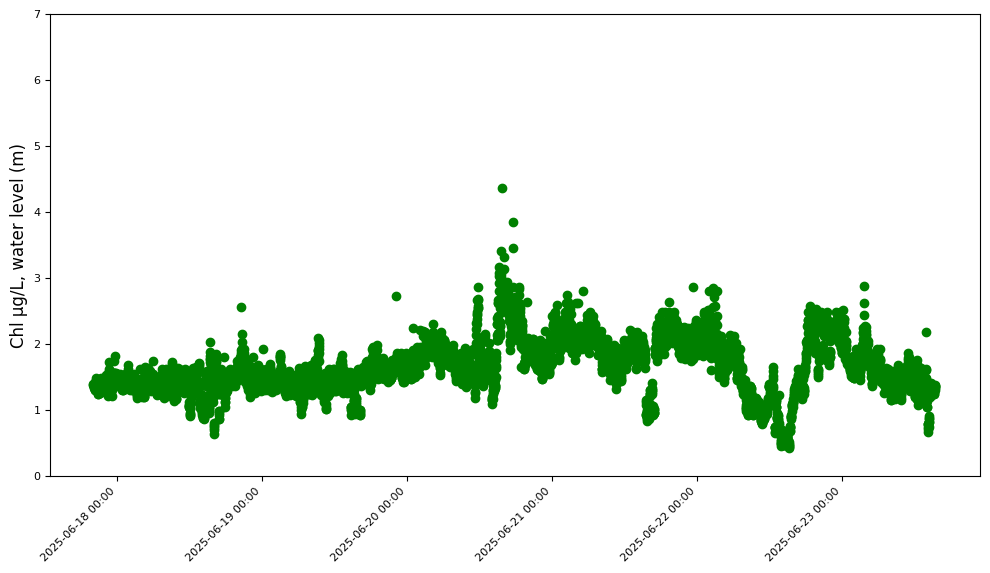

In [17]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(datetime[1000:], chl[1000:], color = 'green', label='chl')
#ax.plot(datetime_vann, level/100, color = 'blue', label='water level')
ax.set_ylim(0,7)

import matplotlib.dates as mdates

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

ax.set_ylabel('Chl µg/L, water level (m)', fontsize =(12)) 

plt.show()


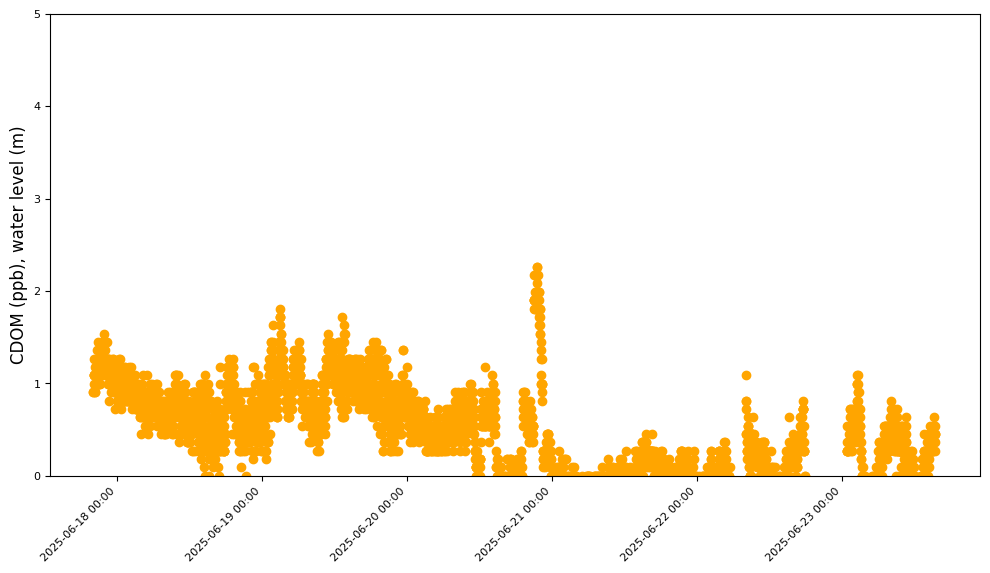

In [18]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(datetime[1000:], cDOM[1000:], color = 'orange', label='chl')
#ax.plot(datetime_vann, level/100, color = 'blue', label='water level')
ax.set_ylim(0,5)

import matplotlib.dates as mdates

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

ax.set_ylabel('CDOM (ppb), water level (m)', fontsize =(12)) 

plt.show()

In [14]:
calibrated_data = pd.DataFrame({'datetime':datetime, 'chl':chl, 'turb': turb, 'cDOM':cDOM})

In [15]:
print(calibrated_data)

                datetime      chl      turb      cDOM
0    2025-06-16 16:16:02  11.6266  0.012101  369.5115
1    2025-06-16 16:16:03  11.5900  0.012101  369.5115
2    2025-06-16 16:16:04  11.6022  0.012101  369.5115
3    2025-06-16 16:16:05  11.5900  0.012101  369.5115
4    2025-06-16 16:16:06  11.5778  0.012101  369.5115
...                  ...      ...       ...       ...
6026 2025-06-23 15:56:35  12.3220  0.012101  369.5115
6027 2025-06-23 15:56:36  12.3220  0.012101  369.5115
6028 2025-06-23 15:56:37  12.2976  0.012101  369.5115
6029 2025-06-23 15:56:39  12.3098  0.012101  369.5115
6030                 NaT      NaN       NaN       NaN

[6031 rows x 4 columns]


In [16]:
calibrated_data.to_csv('TBS-ecotriplet\\calibrated_data_2025_06_23.txt', sep='\t')